## Introduction

Welcome to **CS188 - Data Science Fundamentals!** We plan on having you go through some grueling training so you can start crunching data out there... in today's day and age "data is the new oil" or perhaps "snake oil" nonetheless, there's a lot of it, each with different purity (so pure that perhaps you could feed off it for a life time) or dirty which then at that point you can either decide to dump it or try to weed out something useful (that's where they need you... )


In this project you will work through an example project end to end. 

Here are the main steps:

1. Get the data
2. Visualize the data for insights
3. Preprocess the data for your machine learning algorithm
4. Select a model and train
5. Does it meet the requirements? Fine tune the model

![steps](MLprocess.jpg)



## Working with Real Data

It is best to experiment with real-data as opposed to aritifical datasets. 

There are many different open datasets depending on the type of problems you might be interested in!

Here are a few data repositories you could check out:
- [UCI Datasets](http://archive.ics.uci.edu/ml/)
- [Kaggle Datasets](kaggle.com)
- [AWS Datasets](https://registry.opendata.aws)

Below we will run through an California Housing example collected from the 1990's.

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5) # python>=3.5
import sklearn
assert sklearn.__version__ >= "0.20" # sklearn >= 0.20

import numpy as np #numerical package in python
import os
%matplotlib inline
import matplotlib.pyplot as plt #plotting package

# to make this notebook's output identical at every run
np.random.seed(42)

#matplotlib magic for inline figures
%matplotlib inline 
import matplotlib # plotting library
import matplotlib.pyplot as plt

# Where to save the figures
ROOT_DIR = "."
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    '''
        plt.savefig wrapper. refer to 
        https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
    '''
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
import os
import tarfile
import urllib
DATASET_PATH = os.path.join("datasets", "housing")

## Intro to Data Exploration Using Pandas

In this section we will load the dataset, and visualize different
features using different types of plots.

Packages we will use:
- **[Pandas](https://pandas.pydata.org):** is a fast, flexibile and expressive data structure widely used for tabular and multidimensional datasets.
- **[Matplotlib](https://matplotlib.org)**: is a 2d python plotting library which you can use to create quality figures (you can plot almost anything if you're willing to code it out!)
    - other plotting libraries:[seaborn](https://seaborn.pydata.org), [ggplot2](https://ggplot2.tidyverse.org)

In [3]:
import pandas as pd

def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data(DATASET_PATH) # we load the pandas dataframe
housing.head() # show the first few elements of the dataframe
               # typically this is the first thing you do
               # to see how the dataframe looks like

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


A dataset may have different types of features
- real valued
- Discrete (integers)
- categorical (strings)

The two categorical features are essentialy the same as you can always map a categorical string/character to an
integer. 

In the dataset example, all our features are real valued floats, except ocean proximity which is categorical.

In [5]:
# to see a concise summary of data types, null values, and counts
# use the info() method on the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# you can access individual columns similarly
# to accessing elements in a python dict
housing["ocean_proximity"].head() # added head() to avoid printing many columns..

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [7]:
# to access a particular row we can use iloc
housing.iloc[1]

longitude              -122.22
latitude                 37.86
housing_median_age          21
total_rooms               7099
total_bedrooms            1106
population                2401
households                1138
median_income           8.3014
median_house_value      358500
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [8]:
# one other function that might be useful is
# value_counts(), which counts the number of occurences
# for categorical features
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# The describe function compiles your typical statistics for each
# column
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### If you want to learn about different ways of accessing elements or other functions it's useful to check out the getting started section [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)

## Let's start visualizing the dataset

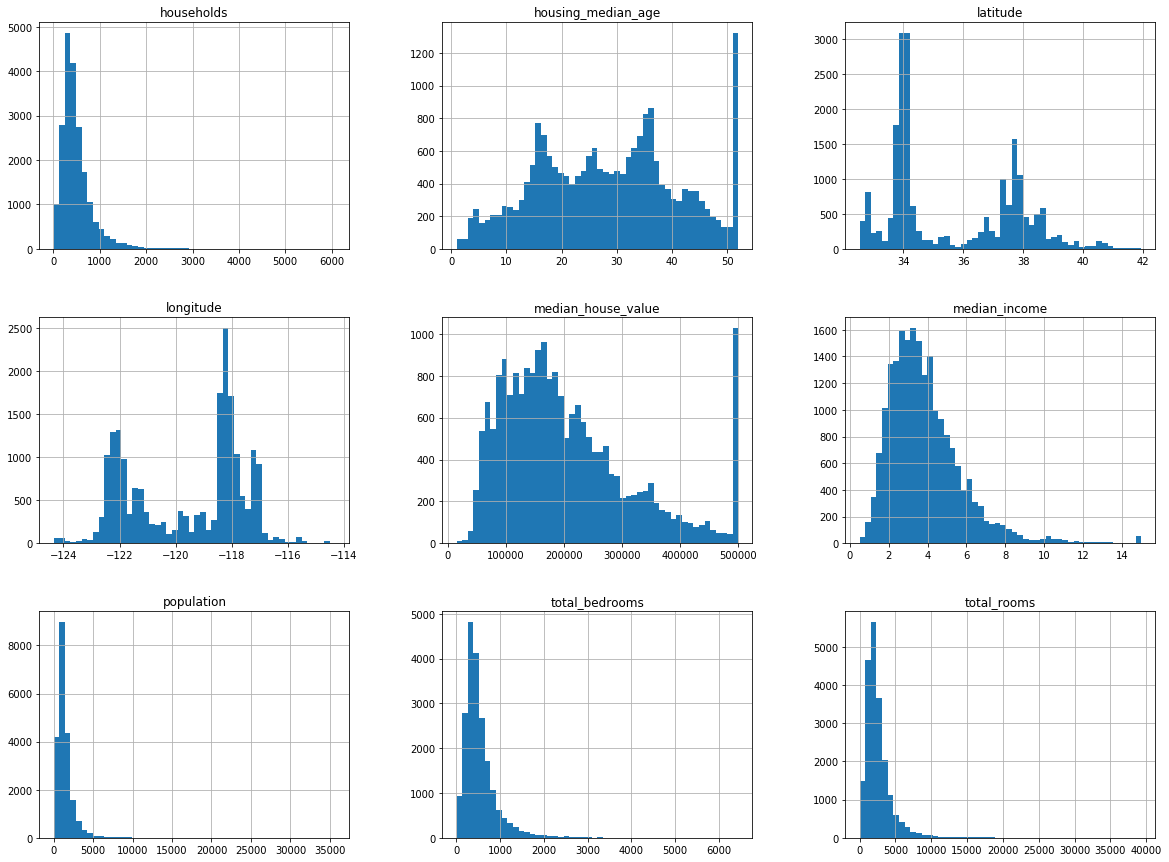

In [10]:
# We can draw a histogram for each of the dataframes features
# using the hist function
housing.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show() # pandas internally uses matplotlib, and to display all the figures
           # the show() function must be called

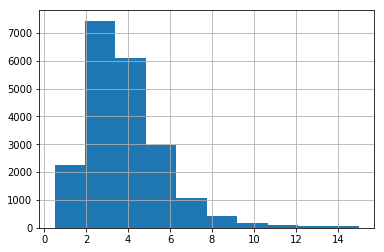

In [11]:
# if you want to have a histogram on an individual feature:
housing["median_income"].hist()
plt.show()

We can convert a floating point feature to a categorical feature
by binning or by defining a set of intervals. 

For example, to bin the 
households based on median_income we can use the pd.cut function

In [12]:
# assign each bin a categorical value [1, 2, 3, 4, 5] in this case.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

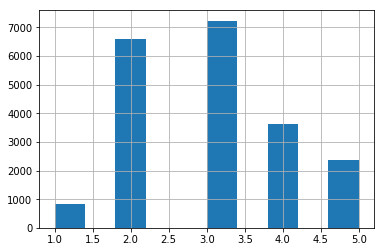

In [13]:
housing["income_cat"].hist()

#### Next let's visualize the household incomes based on latitude & longitude coordinates

Saving figure bad_visualization_plot


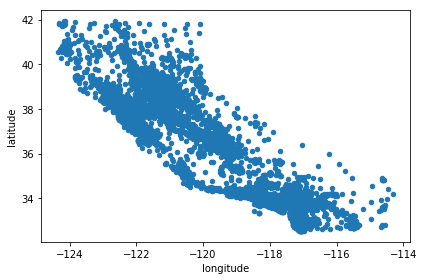

In [14]:
## here's a not so interestting way plotting it
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


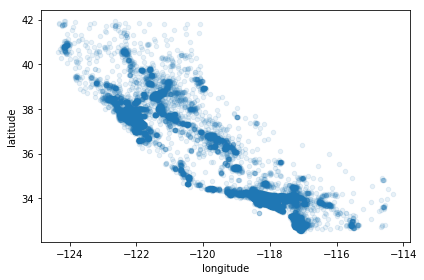

In [15]:
# we can make it look a bit nicer by using the alpha parameter, 
# it simply plots less dense areas lighter.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure california_housing_prices_plot


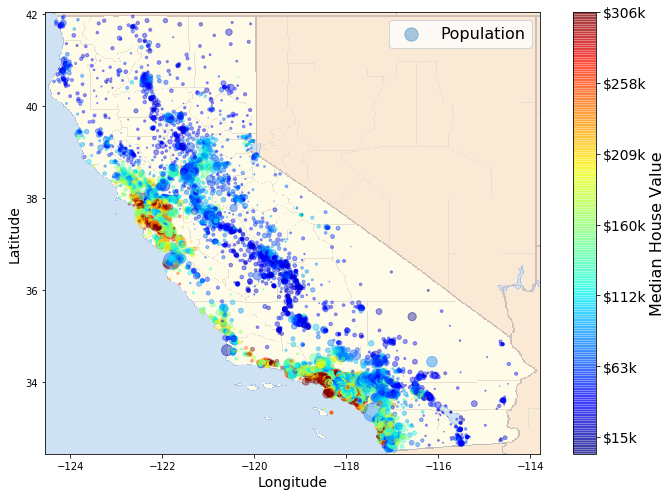

In [17]:
# A more interesting plot is to color code (heatmap) the dots
# based on income. The code below achieves this

# load an image of california
images_path = os.path.join('./', "images")
os.makedirs(images_path, exist_ok=True)
filename = "california.png"

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
# reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
# overlay the califronia map on the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.
# extent specifies [left,right,bottom,top] refet to the min and max of longitude and latitude 
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# setting up heatmap colors based on median_house_value feature
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cb.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

Not suprisingly, the most expensive houses are concentrated around the San Francisco/Los Angeles areas.

Up until now we have only visualized feature histograms and basic statistics. 

When developing machine learning models the predictiveness of a feature for a particular target of intrest is what's important.

It may be that only a few features are useful for the target at hand, or features may need to be augmented by applying certain transfomrations. 

None the less we can explore this using correlation matrices.

In [18]:
corr_matrix = housing.corr()

In [19]:
# for example if the target is "median_house_value", most correlated features can be sorted
# which happens to be "median_income". This also intuitively makes sense.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


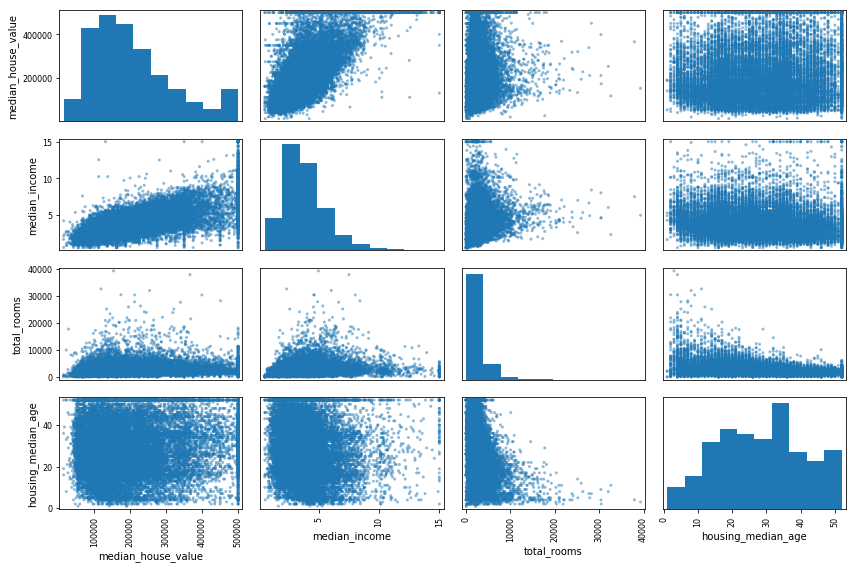

In [20]:
# the correlation matrix for different attributes/features can also be plotted
# some features may show a positive correlation/negative correlation or
# it may turn out to be completely random!
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


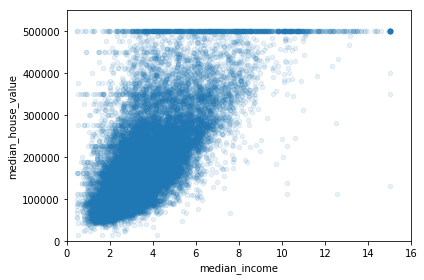

In [21]:
# median income vs median house vlue plot plot 2 in the first row of top figure
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

### Augmenting Features
New features can be created by combining different columns from our data set.

- rooms_per_household = total_rooms / households
- bedrooms_per_room = total_bedrooms / total_rooms
- etc.

In [22]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [23]:
# obtain new correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

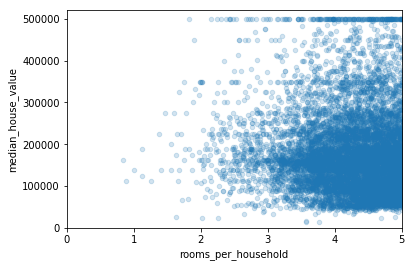

In [24]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [25]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Preparing Dastaset for ML

Once we've visualized the data, and have a certain understanding of how the data looks like. It's time to clean!

Most of your time will be spent on this step, although the datasets used in this project are relatively nice and clean... it could get real dirty.

After having cleaned your dataset you're aiming for:
- train set
- test set

In some cases you might also have a validation set as well for tuning hyperparameters (don't worry if you're not familiar with this term yet..)

In supervised learning setting your train set and test set should contain (**feature**, **target**) tuples. 
 - **feature**: is the input to your model
 - **target**: is the ground truth label
     - when target is categorical the task is a classification task
     - when target is floating point the task is a regression task
     
We will make use of **[scikit-learn](https://scikit-learn.org/stable/)** python package for preprocessing. 

Scikit learn is pretty well documented and if you get confused at any point simply look up the function/object!

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
# let's first start by creating our train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

In [27]:
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set features
                                                       # the input to the model should not contain the true label
housing_labels = train_set["median_house_value"].copy()

### Dealing With Incomplete Data

In [28]:
# have you noticed when looking at the dataframe summary certain rows 
# contained null values? we can't just leave them as nulls and expect our
# model to handle them for us...
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3,4.866192,NaN,2.468327


In [29]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1: simply drop rows that have null values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household


In [30]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2: drop the complete feature

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3,4.866192,NaN,2.468327


In [31]:
median = housing["total_bedrooms"].median() 
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3: replace na values with median values
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,4,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,4,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,2,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,3,4.866192,NaN,2.468327


Could you think of another plausible imputation for this dataset? (Not graded)

### Prepare Data

In [32]:
# This cell implements the complete pipeline for preparing the data
# using sklearns TransformerMixins
# Earlier we mentioned different types of features: categorical, and floats.
# In the case of floats we might want to convert them to categories.
# On the other hand categories in which are not already represented as integers must be mapped to integers before
# feeding to the model.

# Additionally, categorical values could either be represented as one-hot vectors or simple as normalized/unnormalized integers.
# Here we encode them using one hot vectors.

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin


imputer = SimpleImputer(strategy="median") # use median imputation for missing values
housing_num = housing.drop("ocean_proximity", axis=1) # remove the categorical feature
# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# 
class AugmentFeatures(BaseEstimator, TransformerMixin):
    '''
    implements the previous features we had defined
    housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
    housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
    housing["population_per_household"]=housing["population"]/housing["households"]
    '''
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = AugmentFeatures(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
numerical_features = list(housing_num)
categorical_features = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

### Select a model and train

Once we have prepared the dataset it's time to choose a model.

As our task is to predict the median_house_value (a floating value), regression is well suited for this.

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# let's try the full preprocessing pipeline on a few training instances
data = test_set.iloc[:5]
labels = housing_labels.iloc[:5]
data_prepared = full_pipeline.transform(data)

print("Predictions:", lin_reg.predict(data_prepared))
print("Actual labels:", list(labels))


Predictions: [425717.48517515 267643.98033218 227366.19892733 199614.48287493
 161425.25185885]
Actual labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


We can evaluate our model using certain metrics, a fitting metric for regresison is the mean-squared-loss

$$L(\hat{Y}, Y) = \sum_i^N (\hat{y_i} - y_i)^2$$

where $\hat{y}$ is the predicted value, and y is the ground truth label. 

In [34]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(housing_prepared)
mse = mean_squared_error(housing_labels, preds)
rmse = np.sqrt(mse)
rmse

67784.32202861732

# TODO: Applying the end-end ML steps to a different dataset.

We will apply what we've learnt to another dataset (airbnb dataset). We will predict airbnb price based on other features.

# [25 pts] Visualizing Data 


### [5 pts] Load the data + statistics

- load the dataset
- display the first few rows of the data
- drop the following columns: name, host_id, host_name, last_review
- display a summary of the statistics of the loaded data
- plot histograms for 3 features of your choice

In [2]:
import os
import tarfile
import urllib
DATASET_PATH = os.path.join("datasets", "airbnb")

In [3]:
import pandas as pd

def load_airbnb_data(airbnb_path):
    csv_path = os.path.join(airbnb_path, "AB_NYC_2019.csv")
    return pd.read_csv(csv_path)

In [4]:
# load the dataset and display the first few rows 
airbnb = load_airbnb_data(DATASET_PATH)
# drop the specified columns
airbnb.drop(['name', 'host_id', 'host_name', 'last_review'],
            axis=1,inplace=True)
airbnb.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [5]:
# summary of the statistic of airbnb data
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
id                                48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.5+ MB


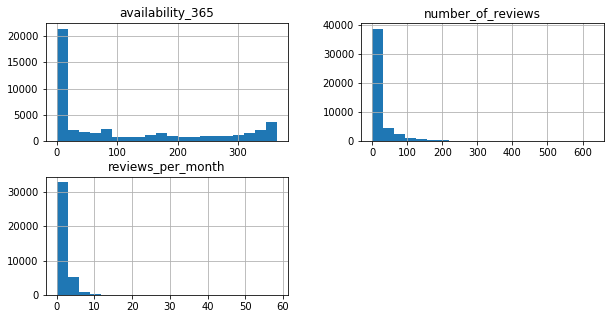

In [7]:
# histogram of three features of choice 
airbnb[
    ['availability_365','reviews_per_month','number_of_reviews']
      ].hist(bins=20, figsize=(10,5))
plt.show()

### [5 pts] Plot total number_of_reviews per neighbourhood_group

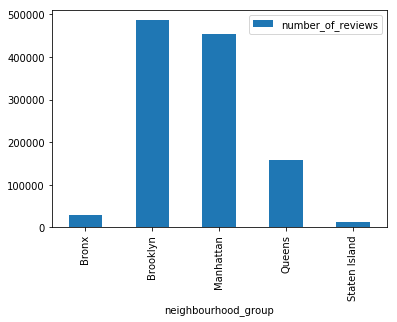

In [8]:
total_reviews_per_group_df = airbnb.groupby(
                            "neighbourhood_group"
                            )['number_of_reviews'].sum().to_frame()
total_reviews_per_group_df.plot(kind="bar")
plt.show()

### [5 pts] Plot map of airbnbs throughout New York (if it gets too crowded take a subset of the data, and try to make it look nice if you can :) ). 

In [9]:
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### We can tell from the above summary that there are outlier in price (mean is 152, max is 10000), thus we use a subset of the houses (price <= 175 , 75 % of them ) to plot the map


Saving figure airbnb_housing_prices_plot


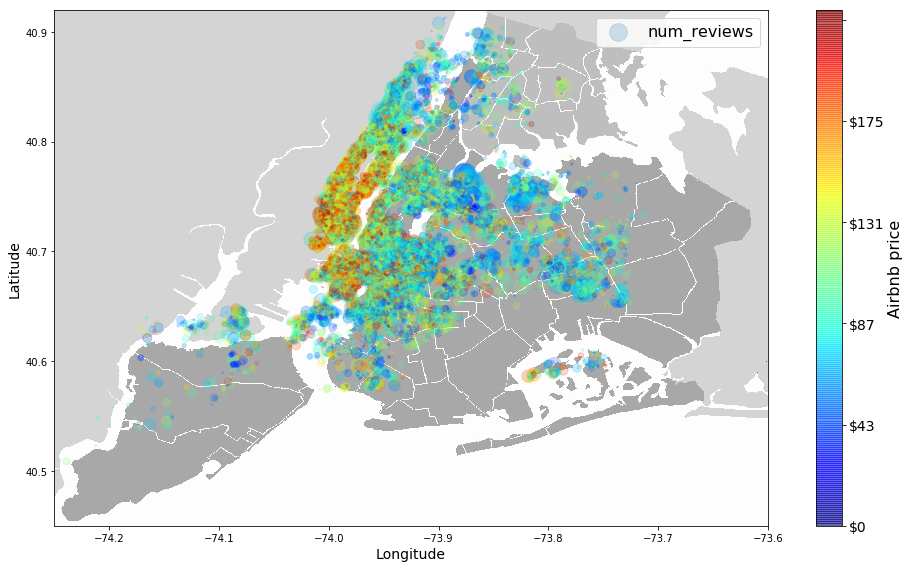

In [92]:
# load the NYC map image
images_path = os.path.join('./', "images")
os.makedirs(images_path, exist_ok=True)
filename = "nyc.png"

import matplotlib.image as mpimg
airbnb_subset = airbnb[airbnb.price <= 175]

nyc_img = mpimg.imread(os.path.join(images_path,filename),0)
ax = airbnb_subset.plot(kind="scatter",x="longitude",y="latitude", 
                 s=airbnb_subset["number_of_reviews"], label="num_reviews",
                 c="price", cmap = plt.get_cmap("jet"), colorbar=False,
                 alpha=0.2,figsize=(14,8))

plt.imshow(nyc_img)
# overlay the califronia map on the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.
# extent specifies [left,right,bottom,top] refet to 
#the min and max of longitude and latitude 
plt.imshow(nyc_img, extent=[-74.25, -73.6, 40.45, 40.92], alpha=0.6,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# setting up heatmap colors based on median_house_value feature
prices = airbnb_subset["price"]
tick_values = np.linspace(prices.min(), prices.max(), 5)
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%d"%(v) for v in tick_values], fontsize=14)
cb.set_label('Airbnb price', fontsize=16)

plt.legend(fontsize=16)
save_fig("airbnb_housing_prices_plot")
plt.show()


### [5 pts] Plot average price of room types who have availability greater than 180 days. 

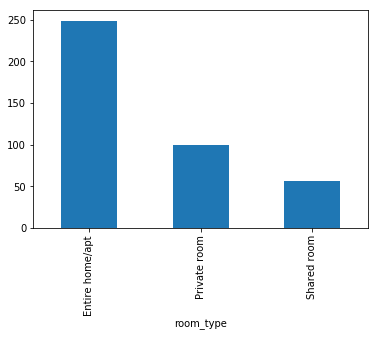

In [100]:
airbnb[airbnb.availability_365 > 180].groupby("room_type").mean()['price'].plot(
                                                                        kind="bar"
                                                                                )
plt.show()

### [5 pts] Plot correlation matrix
- which features have positive correlation?
- which features have negative correlation?

## Answer:
- Features with positive correlation: **price, availability_365, calculated_host_listings_count, minimum_nights, latitude and id**

- Features with negative correlations: **reviews_per_month, number_of_reviews and longitude**

For the correlation matrices, I only ploted the top three positive correlated features and all negative correlated features

In [14]:
corr_matrix = airbnb.corr()
corr_matrix['price'].sort_values(ascending=False)

price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
id                                0.010619
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

Saving figure scatter_pos_matrix_plot


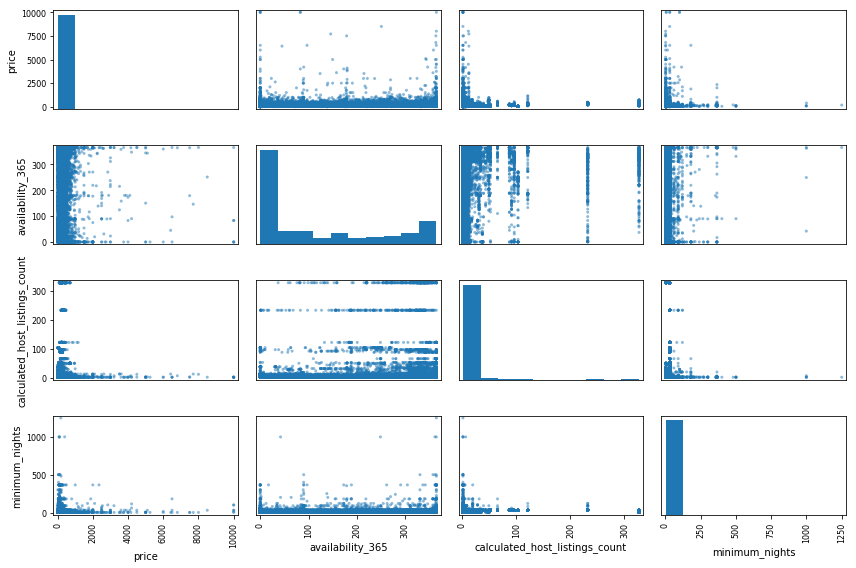

In [15]:
from pandas.plotting import scatter_matrix
# plot features with positive correlations 
pos_attributes = ['price','availability_365',
                  'calculated_host_listings_count','minimum_nights']
scatter_matrix(airbnb[pos_attributes], figsize=(12, 8))
save_fig("scatter_pos_matrix_plot")

Saving figure scatter_neg_matrix_plot


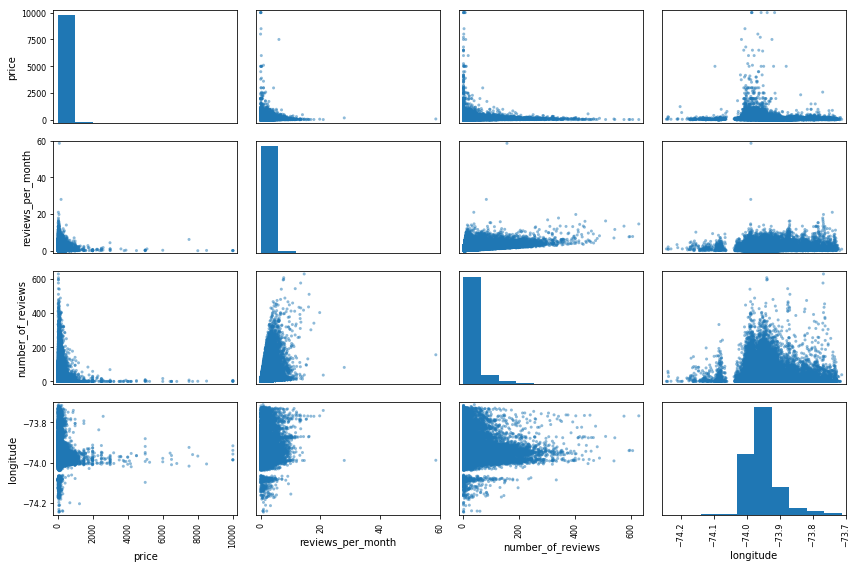

In [252]:
# plot features with negative correlations 
neg_attributes = ['price','reviews_per_month','number_of_reviews','longitude']
scatter_matrix(airbnb[neg_attributes], figsize=(12, 8))
save_fig("scatter_neg_matrix_plot")

# [25 pts] Prepare the Data

In [10]:
airbnb[['price']].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


### [5 pts] Set aside 20% of the data as test test (80% train, 20% test).

In [11]:
# we will make a price category group based, 
# the value of bins are chosen based on the statistic 
# computed from airbnb.describe() above 
airbnb['price_cat'] = pd.cut(airbnb['price'],
                             bins=[-1,70,110,175,np.inf],
                             labels=[1,2,3,4])


from sklearn.model_selection import StratifiedShuffleSplit
# let's first start by creating our train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnb, airbnb["price_cat"]):
    train_set = airbnb.loc[train_index]
    test_set = airbnb.loc[test_index]
print(len(train_set), len(test_set), len(airbnb))

39116 9779 48895


### [5 pts] Augment the dataframe with two other features which you think would be useful

### Two features that might be useful:
#### 1. The aspect ratio between each house's review with the average review around that neighborhood  
#### 2. The aspect ratio between each house's review with the average review of same type room 

In [362]:

# assign average price based on neighbourhood_group 
group_by = airbnb[airbnb.availability_365>=180].groupby("neighbourhood_group")
ave_review_neighbour = group_by['number_of_reviews'].mean().to_frame()
airbnb['ave_review_group'] = airbnb['neighbourhood_group'].map(
                                ave_review_neighbour['number_of_reviews']
                                                                )

# Feature 1: the aspect ratio between each house's review 
# with the avearge review of tht neighborhood
airbnb['review/ave_review_group'] = airbnb['number_of_reviews'] \
                                    / airbnb['ave_review_group']

# assign average price based on neighbourhood_group 
group_by = airbnb[airbnb.availability_365>=180].groupby("room_type")
review_room_type = group_by['number_of_reviews'].mean().to_frame()
airbnb['ave_review_room_type'] = airbnb['room_type'].map(
                                     ave_review_room_type['number_of_reviews']
                                                        )

# Feature 2: the aspect ratio between each house's review 
# with the avearge review of same type room 
airbnb['review/ave_review_room_type'] = airbnb['number_of_reviews'] \
                                        / airbnb['ave_review_room_type']


In [363]:
airbnb.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ave_review_group,review/ave_review_group,count,count%,price_cat,ave_review_room_type,review/ave_review_room_type
15657,14705209,Manhattan,Murray Hill,40.74993,-73.97700,Entire home/apt,2,32,0.91,1,0,28.101979,1.138710,13199,0.609344,3,34.685008,0.922589
1115,4616865,Brooklyn,Crown Heights,40.67569,-73.95548,Private room,10,0,NaN,1,0,41.577265,0.000000,10132,0.503979,1,35.846758,0.000000
36915,20671003,Brooklyn,Bushwick,40.70587,-73.92358,Entire home/apt,2,13,0.57,2,0,41.577265,0.312671,9559,0.475478,2,34.685008,0.374802
17651,21707762,Manhattan,Upper West Side,40.79069,-73.96614,Entire home/apt,3,1,0.05,1,0,28.101979,0.035585,13199,0.609344,4,34.685008,0.028831
16728,18992110,Manhattan,Lower East Side,40.71970,-73.99331,Entire home/apt,1,16,0.63,1,0,28.101979,0.569355,13199,0.609344,3,34.685008,0.461294


### [5 pts] Impute any missing feature with a method of your choice, and briefly discuss why you chose this imputation method


##### reviews_per_month is the only missing value, I decide to use the median to replace the missing values,  althogh there are outliers like max = 58.5 below, the std 1.68 indicates small variance, thus using median is accetbale in this case

In [17]:
airbnb['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [302]:

sample_incomplete_rows = airbnb[airbnb.isnull().any(axis=1)].head()
sample_incomplete_rows

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_cat,ave_review_group,count,count%,review/ave_review_group
10,11452,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365,1,41.308623,10132,0.503979,0.0
11,11943,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365,3,41.308623,10132,0.503979,0.0
63,65556,Brooklyn,Williamsburg,40.71368,-73.96260,Private room,60,3,0,NaN,1,0,1,41.308623,10132,0.503979,0.0
122,250311,Brooklyn,Crown Heights,40.67495,-73.95563,Private room,150,3,0,NaN,1,0,3,41.308623,10132,0.503979,0.0
150,283072,Brooklyn,Cypress Hills,40.67889,-73.86404,Private room,75,7,0,NaN,1,0,2,41.308623,10132,0.503979,0.0


In [304]:
median = airbnb["reviews_per_month"].median() 
sample_incomplete_rows["reviews_per_month"].fillna(median, inplace=True) 
sample_incomplete_rows

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_cat,ave_review_group,count,count%,review/ave_review_group
10,11452,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0.72,1,365,1,41.308623,10132,0.503979,0.0
11,11943,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,0.72,1,365,3,41.308623,10132,0.503979,0.0
63,65556,Brooklyn,Williamsburg,40.71368,-73.96260,Private room,60,3,0,0.72,1,0,1,41.308623,10132,0.503979,0.0
122,250311,Brooklyn,Crown Heights,40.67495,-73.95563,Private room,150,3,0,0.72,1,0,3,41.308623,10132,0.503979,0.0
150,283072,Brooklyn,Cypress Hills,40.67889,-73.86404,Private room,75,7,0,0.72,1,0,2,41.308623,10132,0.503979,0.0


### [10 pts] Code complete data pipeline using sklearn mixins

In [21]:
## Complete pipeline from loading dataframe to feature augment and scaling 

In [404]:
# I wrote this augment_feature function to avoid using the AugmentFeatures class
# The reason I chose not to use AugmentFeatures was 
# because AugmentFeatures takes ndarrays 
# I need to use groupby function from dataframes 
# thus for simplicity I decide to use a seprate function 
def augment_features(df):
    # assign average price based on neighbourhood_group 
    group_by = df[df.availability_365>=180].groupby("neighbourhood_group")
    review_neighbor = group_by['number_of_reviews'].mean().to_frame()
    df['ave_review_group']=df['neighbourhood_group'].map(
                                            review_neighbor['number_of_reviews']
                                                        )

    # Feature 1: 
    # the aspect ratio between house's review with the avearge review of neighborhood
    df['review/ave_review_group'] = df['number_of_reviews'] \
                                    / df['ave_review_group']
    # assign average price based on neighbourhood_group 
    group_by = df[df.availability_365>=180].groupby("room_type")
    ave_review_room_type = group_by['number_of_reviews'].mean().to_frame()
    df['ave_review_room_type'] = df['room_type'].map(
                                            ave_review_room_type['number_of_reviews']
                                                    )

    # Feature 2:
    # the aspect ratio between house's review with the avearge review of same room 
    df['review/ave_review_room_type'] = df['number_of_reviews']\ 
                                      / df['ave_review_room_type']
    return df

In [453]:
# load the dataset and display the first few rows 
airbnb = load_airbnb_data(DATASET_PATH)
# drop the specified columns
airbnb.drop(['name', 'host_id', 'host_name', 'last_review'],axis=1,inplace=True)

airbnb = augment_features(airbnb)
airbnb.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ave_review_group,review/ave_review_group,ave_review_room_type,review/ave_review_room_type
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,41.308623,0.217872,35.023045,0.256974
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,28.349819,1.587312,34.927579,1.288380
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,28.349819,0.000000,35.023045,0.000000
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,41.308623,6.536166,34.927579,7.730281
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,28.349819,0.317462,34.927579,0.257676


In [454]:
# we will make a price category group based, 
# the value of bins are chosen based on the statistic 
# computed from airbnb.describe() 
airbnb['price_cat'] = pd.cut(airbnb['price'],
                            bins=[-1,70,110,175,np.inf],
                            labels=[1,2,3,4])


from sklearn.model_selection import StratifiedShuffleSplit
# let's first start by creating our train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnb, airbnb["price_cat"]):
    train_set = airbnb.loc[train_index]
    test_set = airbnb.loc[test_index]

In [455]:
airbnb = train_set.drop("price", axis=1) # drop labels for training set features
                     # the input to the model should not contain the true label
airbnb_labels = train_set["price"].copy()

In [456]:
# Copied and modified from the above section 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

# column index
# price_ix, ave_price_group_ix, ave_price_room_type_ix = 2, 7, 8

# remove the categorical feature and id since id is not a relevent feature 
airbnb_num = airbnb.drop(['id','neighbourhood_group',
                          'neighbourhood','room_type',
                          'ave_review_group',
                          'ave_review_room_type',
                          'price_cat'], axis=1) 


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

airbnb_num_tr = num_pipeline.fit_transform(airbnb_num)
numerical_features = list(airbnb_num)

categorical_features = ['neighbourhood_group','room_type']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

airbnb_prepared = full_pipeline.fit_transform(airbnb)



# [15 pts] Fit a model of your choice

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using MSE.
Provide both test and train set MSE values.

In [457]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(airbnb_prepared, airbnb_labels)

# let's try the full preprocessing pipeline on a few training instances
test_data = test_set.iloc[0:10]
test_labels = test_set.price[0:10]
data_prepared = full_pipeline.transform(test_data)

print("Predictions:", lin_reg.predict(data_prepared))
print("Actual labels:", list(test_labels))


Predictions: [288.63911998 147.10485498  81.57175713 203.85278551  48.89723726
 211.02780185  82.36497863 141.20542681 259.70863897  51.55945016]
Actual labels: [1000, 140, 69, 115, 425, 120, 100, 78, 200, 50]


In [458]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(airbnb_prepared)
mse_train = mean_squared_error(airbnb_labels, preds)
rmse_train = np.sqrt(mse_train)

test_data = test_set
test_labels = test_set.price
data_prepared = full_pipeline.transform(test_data)


preds = lin_reg.predict(data_prepared)
mse_test = mean_squared_error(test_labels, preds)
rmse_test = np.sqrt(mse_test)

print("train mse:%d"%(mse_train))
print("test mse:%d"%(mse_test))

print("train rmse:%d"%(rmse_train))
print("test rmse:%d"%(rmse_test))

train mse:50183
test mse:59307
train rmse:224
test rmse:243


#### Although the problem only asked for mse, I printed rmse to understand the performance better